전체 요인, 부분 요인에 대한 회귀분석을 진행, 비교하면서 최적의 경우를 도출하도록 노력

# 패키지 설치

In [1]:
from statsmodels.formula.api import ols
# 주성분 분석용 패키지
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca
# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler

# 엑셀 및 DF 시각화
from pandas import read_excel, DataFrame

# 시각화
from matplotlib import pyplot as plt
import seaborn as sb

# 모듈 불러오기
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
from helper import my_ols, ext_ols

# 문제 1

다음의 데이터는 442명의 당뇨병 환자를 대상으로 검사 결과이다.

주어진 데이터는 표준화가 적용되어 있다.

이를 활용하여 당뇨병 발병 가능성을 예측할 수 있는 회귀모델을 구현하고 분석 결과를 보고하라.

| 변수 | 설명 |
| -- | -- |
| age | 나이 |
| sex | 성별 |
| bmi | bmi지수(비만도) |
| bp | 평균 혈압 |
| s1~s6	 | 6종류의 혈액검사 수치 |
| target | 당뇨병 진행률(종속변수) |

In [2]:
df = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


## 전체 요인에 대한 회귀분석

In [3]:
xnames = list(df.columns)
xnames.remove("target")

ols_result = my_ols(df, y='target', x=xnames)
ols_result

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


## 요약결과

In [4]:
ols_result.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                        15:43:07   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 중간결과
R-squared:	0.518로 나쁘지 않은 정도의 확률

## 결과 요약

In [5]:
ols_result.table

B     표준오차  β        t   유의확률        VIF
종속변수   독립변수                                                  
target age    -10.0099   59.749  0  -0.168*  0.867   1.217315
       sex   -239.8156   61.222  0  -3.917*  0.000   1.283075
       bmi    519.8459   66.533  0   7.813*  0.000   1.532949
       bp     324.3846   65.422  0   4.958*  0.000   1.468583
       s1    -792.1756  416.680  0  -1.901*  0.058  59.257108
       s2     476.7390  339.030  0   1.406*  0.160  39.213144
       s3     101.0433  212.531  0   0.475*  0.635  15.403044
       s4     177.0632  161.476  0   1.097*  0.273   8.893714
       s5     751.2737  171.900  0   4.370*  0.000  10.125073
       s6      67.6267   65.984  0   1.025*  0.306   1.485021

## PCA 패키지를 사용한 분석

In [6]:
# 주성분 분석의 대상 컬럼 수를 독립변수의 전체 컬럼의 길이로 설정
model = pca(n_components=len(df.columns))
# 표준화 결과를 활용하여 주성분 분석 수행
fit = model.fit_transform(df)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':            age       sex       bmi        bp        s1        s2        s3  \
 PC1   0.000116  0.000027  0.000362  0.000273  0.000131  0.000108 -0.000244   
 PC2   0.231817  0.246201  0.163155  0.183988  0.440653  0.469608 -0.216704   
 PC3   0.044893 -0.533429 -0.057330 -0.059426  0.488360  0.316922  0.574502   
 PC4   0.589477  0.152647  0.057172  0.522267 -0.097314 -0.242643  0.303851   
 PC5   0.317331  0.484731 -0.507426 -0.082694  0.113322  0.210233  0.093144   
 PC6  -0.667828  0.395846  0.110199  0.490401  0.135576  0.129053  0.248423   
 PC7   0.205804 -0.169036  0.656297  0.235921 -0.059826  0.127220 -0.158148   
 PC8  -0.086687 -0.203649 -0.295306  0.438122  0.037107 -0.234470 -0.091601   
 PC9   0.011050  0.412072  0.421484 -0.440701  0.125816 -0.208923  0.307578   
 PC10  0.008154 -0.001014  0.040006  0.025776 -0.042269 -0.358278  0.482311   
 PC11  0.003316  0.005393  0.004383 -0.005565  0.709975 -0.562253 -0.315663   
 
             s4        s5        s6   

### 생성된 주성분에 사용된 필드 확인

In [7]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,target,1.000000,best
1,PC2,s2,0.469608,best
2,PC3,s3,0.574502,best
3,PC4,age,0.589477,best
4,PC5,s6,-0.522444,best
5,PC6,age,-0.667828,best
6,PC7,bmi,0.656297,best
7,PC8,s5,0.641222,best
8,PC9,s5,0.490611,best
9,PC10,s4,0.773326,best


## 주성분 분석 결과를 토대로 회귀분석 수행

### 데이터프레임으로 분석

best만 추출

In [8]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
print(feature)

['s2', 's6', 'age', 'bmi', 's5', 'target', 's1', 's3', 's4']


In [9]:
# 당뇨병 진행률(종속변수) : 'target'
ols = my_ols(df, "target", feature)
ols.summary

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.265e+31
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:43:07   Log-Likelihood:                 12424.
No. Observations:                 442   AIC:                        -2.483e+04
Df Residuals:                     432   BIC:                        -2.479e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.951e-13    2.1e-14      9.272      0.000    1.54e-13    2.36e-13
s2           -1.3e-12    9.5e-13     -1.368      0.172   -3.17e-12    5.67e-13
s6          7.283e-14   1.82e-13      0.400      0.689   -2.85e-13    4.31e-13
age        -9.592e-14   1.63e-13     -0.589      0.556   -4.16e-13    2.24e-13
bmi         5.218e-13   1.97e-13      2.647      0.008    1.34e-13    9.09e-13
s5          3.766e-13   4.92e-13      0.766      0.444    -5.9e-13    1.34e-12
target         1.0000    1.3e-16    7.7e+15      0.000       1.000       1.000
s1          4.974e-13   1.17e-12      0.426      0.671    -1.8e-12    2.79e-12
s3         -3.197e-13   5.94e-13     -0.538      0.591   -1.49e-12    8.48e-13
s4         -3.393e-13    4.5e-13     -0.755      0.451   -1.22e-12    5.45e-13
==============================================================================
Omnibus:                        6.445   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                7.886
Skew:                           0.148   Prob(JB):                       0.0194
Kurtosis:                       3.583   Cond. No.                     3.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
ols.table

B      표준오차  β         t   유의확률        VIF
종속변수   독립변수                                                       
target s2        -1.3e-12   9.5e-13  0   -1.368*  0.172  39.213144
       s6       7.283e-14  1.82e-13  0    0.400*  0.689   1.485021
       age     -9.592e-14  1.63e-13  0   -0.589*  0.556   1.217315
       bmi      5.218e-13  1.97e-13  0    2.647*  0.008   1.532949
       s5       3.766e-13  4.92e-13  0    0.766*  0.444  10.125073
       target      1.0000   1.3e-16  0  7.7e+15*  0.000   1.118065
       s1       4.974e-13  1.17e-12  0    0.426*  0.671  59.257108
       s3      -3.197e-13  5.94e-13  0   -0.538*  0.591  15.403044
       s4      -3.393e-13   4.5e-13  0   -0.755*  0.451   8.893714

## 결과 보고

In [11]:
당뇨병_진행률 = df["target"]
당뇨병_진행률

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: target, Length: 442, dtype: int64

In [12]:
당뇨병_예측 = ols.fit.predict(df.filter(feature))
당뇨병_예측

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64

In [13]:
result_df = DataFrame({
    "당뇨병_진행률":당뇨병_진행률,
    "당뇨병_예측":당뇨병_예측
})
result_df

,당뇨병_진행률,당뇨병_예측
0,151,151.0
1,75,75.0
2,141,141.0
3,206,206.0
4,135,135.0
...,...,...
437,178,178.0
438,104,104.0
439,132,132.0
440,220,220.0


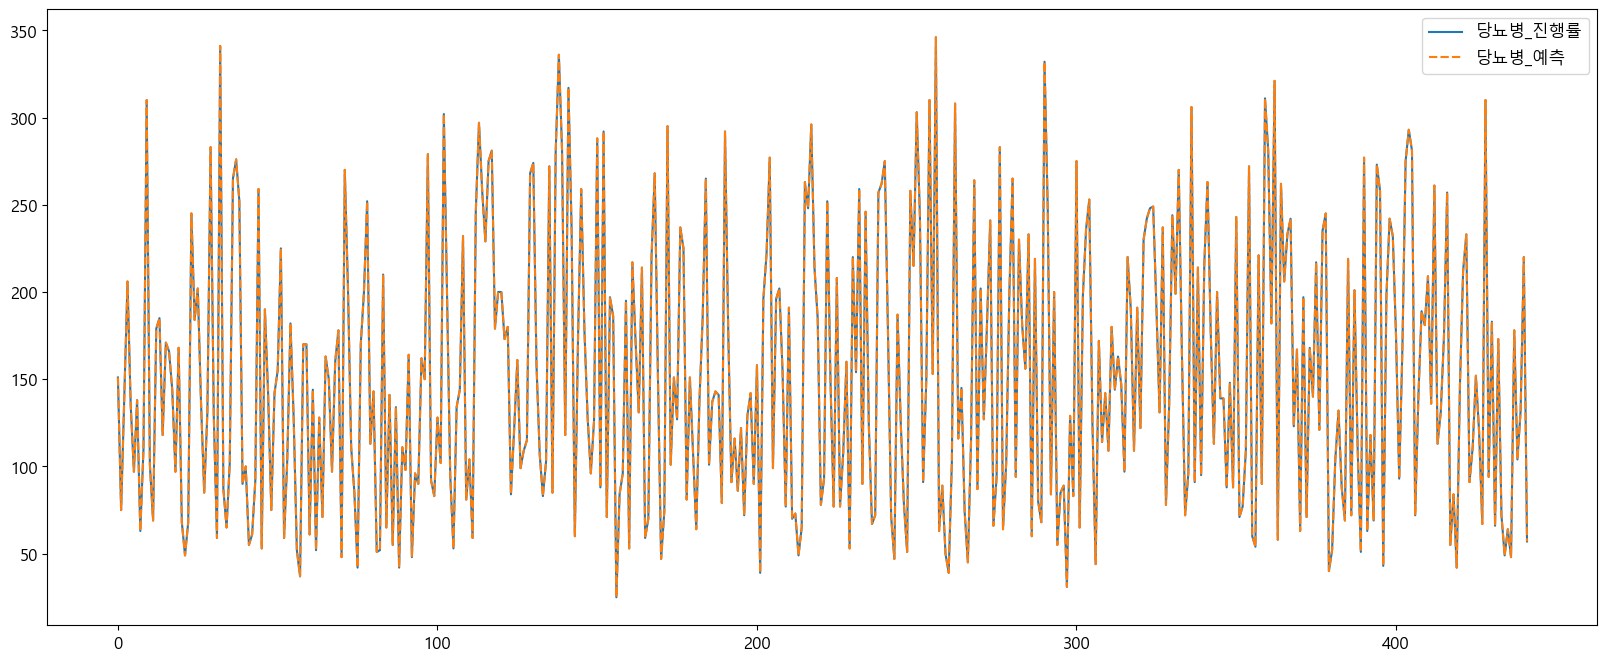

In [14]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["axes.unicode_minus"] = False

sb.lineplot(data=result_df.filter(['당뇨병_진행률', '당뇨병_예측']))
plt.show()
plt.close()

# 문제 2

뉴욕 멘하튼의 주택임대료에 영향을 준다고 예상되는 변수들과 주택 임대료를 정리한 것이다.

다양한 변수 중에서 목표로 하는 종속변수는 `rent`이다. 

분석하라

In [15]:
df = read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
df

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan
